In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
import mplcyberpunk
plt.style.use('cyberpunk')
import numpy as np 


[*********************100%%**********************]  1 of 1 completed


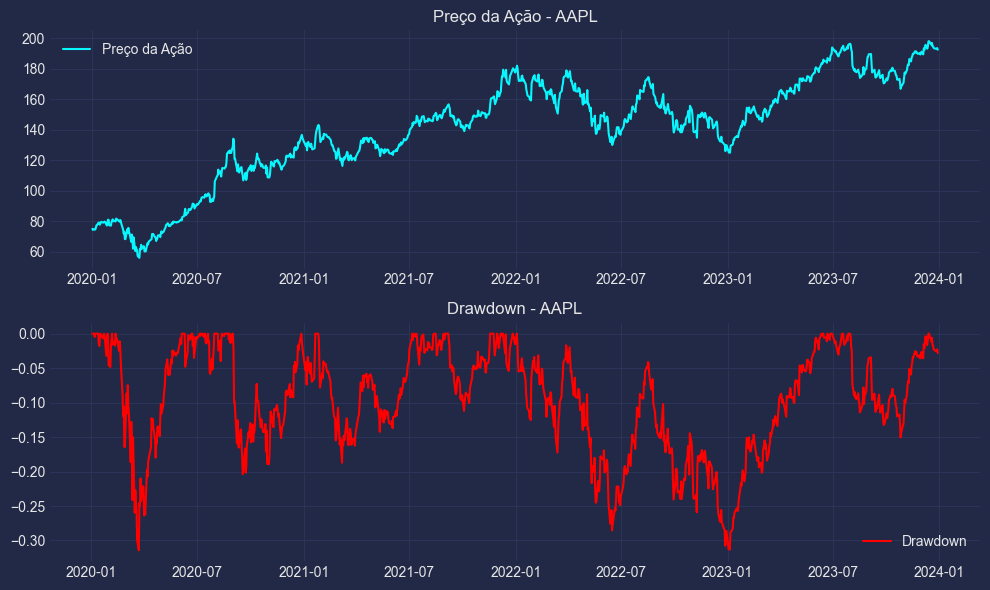

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calcular_drawdown(serie):
    # Calcular o retorno acumulado
    retorno_acumulado = (1 + serie.pct_change()).cumprod()

    # Calcular o máximo histórico em cada ponto
    max_retorno_acumulado = retorno_acumulado.cummax()

    # Calcular o drawdown
    drawdown = (retorno_acumulado / max_retorno_acumulado) - 1

    return drawdown

# Símbolo da ação que você deseja analisar
simbolo_acao = 'AAPL'

# Obtendo dados do Yahoo Finance
dados_acao = yf.download(simbolo_acao, start='2020-01-01', end='2024-01-01')

# Calculando o drawdown
drawdown = calcular_drawdown(dados_acao['Close'])

# Plotando o preço da ação e o drawdown
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(dados_acao['Close'], label='Preço da Ação')
plt.title(f'Preço da Ação - {simbolo_acao}')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(drawdown, label='Drawdown', color='red')
plt.title(f'Drawdown - {simbolo_acao}')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
iNICIO="2020-01-01"

VARIAÇÃO = FINAL/INICIAL-1


In [15]:
acoes=['CMIG4.SA','GOAU4.SA','SAPR4.SA','BPAN4.SA','BBDC4.SA','ITSA4.SA','KLBN4.SA','RANI3.SA','JHSF3.SA','POMO4.SA','DXCO3.SA','POSI3.SA',
       'VULC3.SA','CAMB3.SA','GRND3.SA','SHUL4.SA','ROMI3.SA']
ativo=yf.download(acoes,start=iNICIO)['Adj Close'].round(2).resample('y').last() # baixa os dados dos fechamentos anuais  #
primeiro=ativo.iloc[0] # coletei os dados do primeiro ano #
utimo=ativo.iloc[-1]  # coletei os dados do utimo  ano #
variacao=((utimo-primeiro)/primeiro*100).round(2) # calculo da variação em % #
df=pd.DataFrame(variacao,columns=['VARIAÇÃO %']) # criei um df com os dados coletados #
df

[*********************100%%**********************]  17 of 17 completed


,VARIAÇÃO %
BBDC4.SA,-17.78
BPAN4.SA,-5.06
CAMB3.SA,97.91
CMIG4.SA,67.95
DXCO3.SA,-42.94
GOAU4.SA,51.44
GRND3.SA,4.35
ITSA4.SA,25.93
JHSF3.SA,-25.24
KLBN4.SA,-4.47


                                                                            
BETA = COVARIAÇÃO  DO RETORNO/ VARIACAO DO RETORNO


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf  # Certifique-se de instalar esta biblioteca usando 'pip install yfinance'

def calcular_beta(ticker_ativo, ticker_indice, data_inicio, data_fim):
    # Baixar dados históricos do ativo e do índice de mercado
    ativo = yf.download(ticker_ativo, start=data_inicio, end=data_fim)['Adj Close']
    indice = yf.download(ticker_indice, start=data_inicio, end=data_fim)['Adj Close']

    # Calcular os retornos diários
    retorno_ativo = ativo.pct_change().dropna()
    retorno_indice = indice.pct_change().dropna()

    # Calcular a covariância e a variância
    covariancia = np.cov(retorno_ativo, retorno_indice)[0, 1]
    variancia_indice = np.var(retorno_indice)

    # Calcular o beta
    beta = covariancia / variancia_indice

    return beta

# Exemplo de uso
ativo_ticker = 'PETR4.SA'  # Ticker da ação da Vale
indice_ticker = '^BVSP'  # Ticker do índice Bovespa
inicio_data = '2020-02-05'
fim_data = '2024-02-05'

beta_vale = calcular_beta(ativo_ticker, indice_ticker, inicio_data, fim_data)
print(f'O beta da Vale em relação ao Ibovespa é: {beta_vale:.4f}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
O beta da Vale em relação ao Ibovespa é: 1.3030


DRAWDOWN= (MAXIMA-MIN)/MAXIMA


In [ ]:
acao='ROMI3.SA',"PETR4.SA"
inicio='2018-01-01'

In [ ]:
dados=yf.download(acao,inicio)['Adj Close']
max=dados.cummax()
drawdown=dados/max-1
drawdown_max=drawdown.min()

fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(drawdown.index,drawdown)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_locator(mdate.YearLocator(1))
plt.title(f'{acao} Drawdown')
plt.show()
